In [15]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_India'

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

page = requests.get(url, headers = headers)
soup = BeautifulSoup(page.text, 'html.parser')

In [17]:
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in India - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-conte

In [18]:
<table class="wikitable sortable jquery-tablesorter">


SyntaxError: invalid syntax (1412651892.py, line 1)

In [19]:
table = soup.find_all('table')[0]
table

<table class="wikitable sortable" style="text-align:right;">
<tbody><tr>
<th align="center">Rank
</th>
<th align="center">Forbes<br/> 2000 rank
</th>
<th align="center">Name
</th>
<th align="center">Headquarters
</th>
<th align="center">Revenue<br/>(billions US$)
</th>
<th align="center">Profit<br/>(billions US$)
</th>
<th align="center">Assets<br/>(billions US$)
</th>
<th align="center">Value<br/>(billions US$)
</th>
<th align="center">Industry
</th></tr>
<tr>
<td>1
</td>
<td>49
</td>
<td align="left"><a class="mw-redirect" href="/wiki/Reliance_Industries_Limited" title="Reliance Industries Limited">Reliance Industries Limited</a>
</td>
<td align="left">Mumbai
</td>
<td>108.8
</td>
<td>8.4
</td>
<td>210.5
</td>
<td>233.1
</td>
<td align="left"><a href="/wiki/Conglomerate_(company)" title="Conglomerate (company)">Conglomerate</a>
</td></tr>
<tr>
<td>2
</td>
<td>55
</td>
<td align="left"><a href="/wiki/State_Bank_of_India" title="State Bank of India">State Bank of India</a>
</td>
<td al

In [20]:
world_titles = table.find_all('th')
world_titles

[<th align="center">Rank
 </th>,
 <th align="center">Forbes<br/> 2000 rank
 </th>,
 <th align="center">Name
 </th>,
 <th align="center">Headquarters
 </th>,
 <th align="center">Revenue<br/>(billions US$)
 </th>,
 <th align="center">Profit<br/>(billions US$)
 </th>,
 <th align="center">Assets<br/>(billions US$)
 </th>,
 <th align="center">Value<br/>(billions US$)
 </th>,
 <th align="center">Industry
 </th>]

In [21]:
world_table_titles = [title.text.strip() for title in world_titles]
world_table_titles

['Rank',
 'Forbes 2000 rank',
 'Name',
 'Headquarters',
 'Revenue(billions US$)',
 'Profit(billions US$)',
 'Assets(billions US$)',
 'Value(billions US$)',
 'Industry']

In [22]:
df = pd.DataFrame(columns = world_table_titles)
df

,Rank,Forbes 2000 rank,Name,Headquarters,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$),Industry


In [23]:
column_data = table.find_all('tr')

In [24]:
for row in column_data:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    print(individual_row_data)

[]
['1', '49', 'Reliance Industries Limited', 'Mumbai', '108.8', '8.4', '210.5', '233.1', 'Conglomerate']
['2', '55', 'State Bank of India', 'Mumbai', '71.8', '8.1', '807.4', '87.6', 'Banking']
['3', '65', 'HDFC Bank', 'Mumbai', '49.3', '7.7', '483.2', '133.6', 'Banking']
['4', '70', 'Life Insurance Corporation', 'New Delhi', '98.0', '4.9', '561.4', '73.6', 'Insurance']
['5', '142', 'ICICI Bank', 'Mumbai', '28.5', '5.3', '283.5', '95.3', 'Banking']
['6', '207', 'Oil and Natural Gas Corporation', 'New Delhi', '77.5', '5.1', '80.6', '41.9', 'Oil and gas']
['7', '259', 'Indian Oil Corporation', 'New Delhi', '93.8', '5.0', '57.8', '27.8', 'Oil and gas']
['8', '284', 'Tata Motors', 'Mumbai', '52.9', '3.8', '44.4', '43.8', 'Automotive']
['9', '293', 'Axis Bank', 'Mumbai', '16.7', '3.2', '182.0', '42.3', 'Banking']
['10', '372', 'NTPC Limited', 'New Delhi', '21.2', '2.4', '54.7', '42.5', 'Utilities']
['11', '398', 'Larsen & Toubro', 'Mumbai', '26.7', '1.6', '40.7', '56.9', 'Capital goods']
['

In [25]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]

    length = len(df)
    df.loc[length] = individual_row_data

In [26]:
df

,Rank,Forbes 2000 rank,Name,Headquarters,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$),Industry
0,1,49,Reliance Industries Limited,Mumbai,108.8,8.4,210.5,233.1,Conglomerate
1,2,55,State Bank of India,Mumbai,71.8,8.1,807.4,87.6,Banking
2,3,65,HDFC Bank,Mumbai,49.3,7.7,483.2,133.6,Banking
3,4,70,Life Insurance Corporation,New Delhi,98.0,4.9,561.4,73.6,Insurance
4,5,142,ICICI Bank,Mumbai,28.5,5.3,283.5,95.3,Banking
...,...,...,...,...,...,...,...,...,...
66,65,1895,Dr. Reddy's Laboratories,Hyderabad,3.4,0.7,4.6,11.6,Pharmaceuticals
67,66,1908,Varun Beverages,Gurgaon,2.0,0.3,1.8,23.6,Beverages
68,67,1949,CIFCL,Chennai,2.3,0.4,18.8,13.0,Financials
69,68,1957,NMDC,Hyderabad,2.5,0.8,3.9,9.7,Mining


In [50]:
df.to_csv(r'C:\Users\gudab\Downloads\Web SCraping 2.csv', index = False)

In [51]:
df.shape

(71, 9)

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
df.head()

In [37]:
df.columns

Index(['Rank', 'Forbes 2000 rank', 'Name', 'Headquarters',
       'Revenue(billions US$)', 'Profit(billions US$)', 'Assets(billions US$)',
       'Value(billions US$)', 'Industry'],
      dtype='object')

In [38]:
df = df.replace("−", "-", regex=True)


In [39]:
for col in df.columns:
    print(repr(col))


'Rank'
'Forbes 2000 rank'
'Name'
'Headquarters'
'Revenue(billions US$)'
'Profit(billions US$)'
'Assets(billions US$)'
'Value(billions US$)'
'Industry'


In [40]:
df["Revenue(billions US$)"] = df["Revenue(billions US$)"].astype(float)
df["Profit(billions US$)"] = df["Profit(billions US$)"].astype(float)
df["Assets(billions US$)"] = df["Assets(billions US$)"].astype(float)
df["Value(billions US$)"] = df["Value(billions US$)"].astype(float)


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71 entries, 0 to 70
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   71 non-null     object 
 1   Forbes 2000 rank       71 non-null     int32  
 2   Name                   71 non-null     object 
 3   Headquarters           71 non-null     object 
 4   Revenue(billions US$)  71 non-null     float64
 5   Profit(billions US$)   71 non-null     float64
 6   Assets(billions US$)   71 non-null     float64
 7   Value(billions US$)    71 non-null     float64
 8   Industry               71 non-null     object 
dtypes: float64(4), int32(1), object(4)
memory usage: 5.3+ KB


In [42]:
df.head()

,Rank,Forbes 2000 rank,Name,Headquarters,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$),Industry
0,1,49,Reliance Industries Limited,Mumbai,108.8,8.4,210.5,233.1,Conglomerate
1,2,55,State Bank of India,Mumbai,71.8,8.1,807.4,87.6,Banking
2,3,65,HDFC Bank,Mumbai,49.3,7.7,483.2,133.6,Banking
3,4,70,Life Insurance Corporation,New Delhi,98.0,4.9,561.4,73.6,Insurance
4,5,142,ICICI Bank,Mumbai,28.5,5.3,283.5,95.3,Banking


In [43]:
df["Forbes 2000 rank"] = df["Forbes 2000 rank"].astype(int)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71 entries, 0 to 70
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   71 non-null     object 
 1   Forbes 2000 rank       71 non-null     int32  
 2   Name                   71 non-null     object 
 3   Headquarters           71 non-null     object 
 4   Revenue(billions US$)  71 non-null     float64
 5   Profit(billions US$)   71 non-null     float64
 6   Assets(billions US$)   71 non-null     float64
 7   Value(billions US$)    71 non-null     float64
 8   Industry               71 non-null     object 
dtypes: float64(4), int32(1), object(4)
memory usage: 5.3+ KB


In [45]:
df.nlargest(10, 'Revenue(billions US$)')[['Name','Revenue(billions US$)','Industry']]

,Name,Revenue(billions US$),Industry
0,Reliance Industries Limited,108.8,Conglomerate
3,Life Insurance Corporation,98.0,Insurance
6,Indian Oil Corporation,93.8,Oil and gas
5,Oil and Natural Gas Corporation,77.5,Oil and gas
1,State Bank of India,71.8,Banking
18,Bharat Petroleum,54.1,Oil and gas
7,Tata Motors,52.9,Automotive
2,HDFC Bank,49.3,Banking
50,Rajesh Exports,32.6,Gems and jewellery
11,Tata Consultancy Services,29.1,Infotech


In [46]:
df.nlargest(10, 'Profit(billions US$)')[['Name','Profit(billions US$)','Industry']]

,Name,Profit(billions US$),Industry
0,Reliance Industries Limited,8.4,Conglomerate
1,State Bank of India,8.1,Banking
2,HDFC Bank,7.7,Banking
11,Tata Consultancy Services,5.5,Infotech
4,ICICI Bank,5.3,Banking
5,Oil and Natural Gas Corporation,5.1,Oil and gas
6,Indian Oil Corporation,5.0,Oil and gas
3,Life Insurance Corporation,4.9,Insurance
15,Coal India,3.9,Metals and mining
7,Tata Motors,3.8,Automotive


In [69]:
df[df['Profit(billions US$)'] < 0]

,Rank,Forbes 2000 rank,Name,Headquarters,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$),Industry
30,31,834,Tata Steel,Kolkata,28.3,-0.4,32.7,25.1,Iron and steel


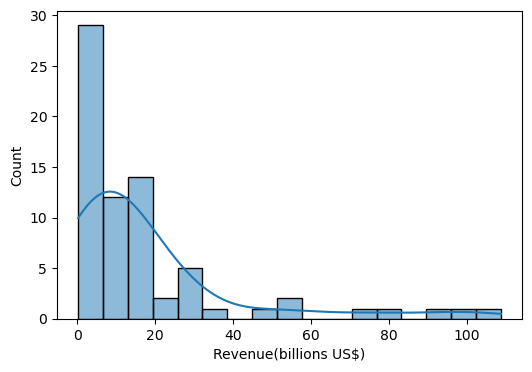

In [70]:
plt.figure(figsize=(6,4))
sns.histplot(df["Revenue(billions US$)"], kde=True)
plt.show()


Most companies have revenues below 20 Billion USD, with only few extremely large companies crossing 50-100 bilions.

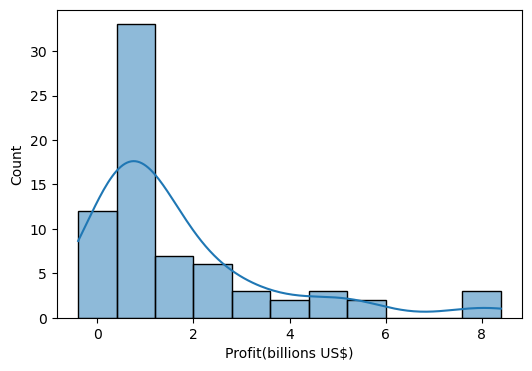

In [71]:
plt.figure(figsize=(6,4))
sns.histplot(df["Profit(billions US$)"], kde=True)
plt.show()


Most companies earn small profits(0-2 billion USD), while only a few companies earn very high profits.

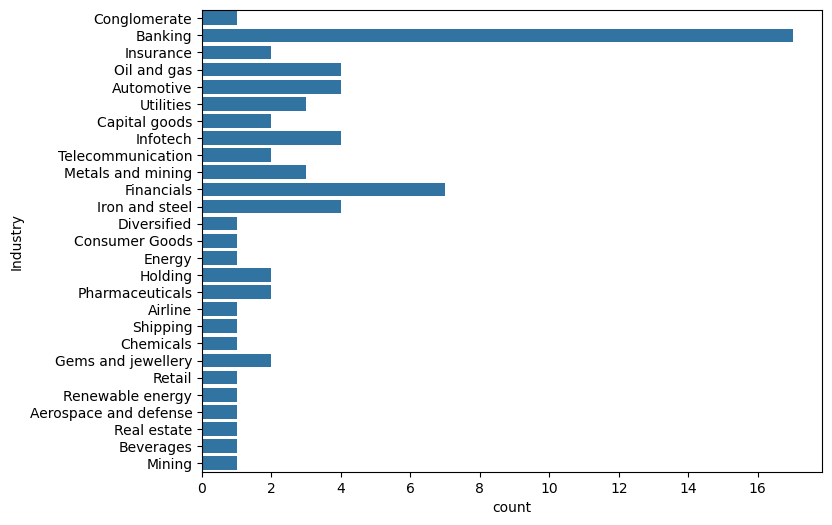

In [72]:
plt.figure(figsize=(8,6))
sns.countplot(y=df["Industry"])
plt.show()


The indian economy is dominated by banking and financial sectors, which account for the largest share of top companies, while many industries are represented by only 1-2 firms.

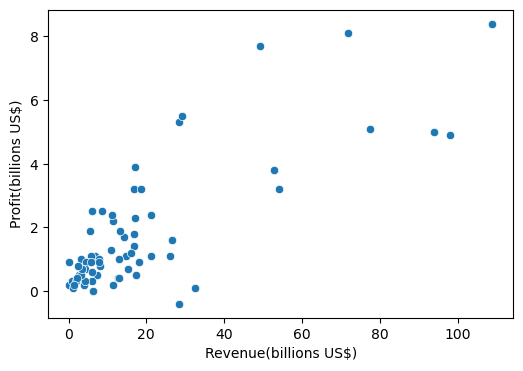

In [73]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df["Revenue(billions US$)"],
    y=df["Profit(billions US$)"]
)
plt.show()


Higher revenue does not always guarantee higher profit — many high-revenue companies still have low profit.
But very high-profit companies generally belong to the group with mid to high revenue.

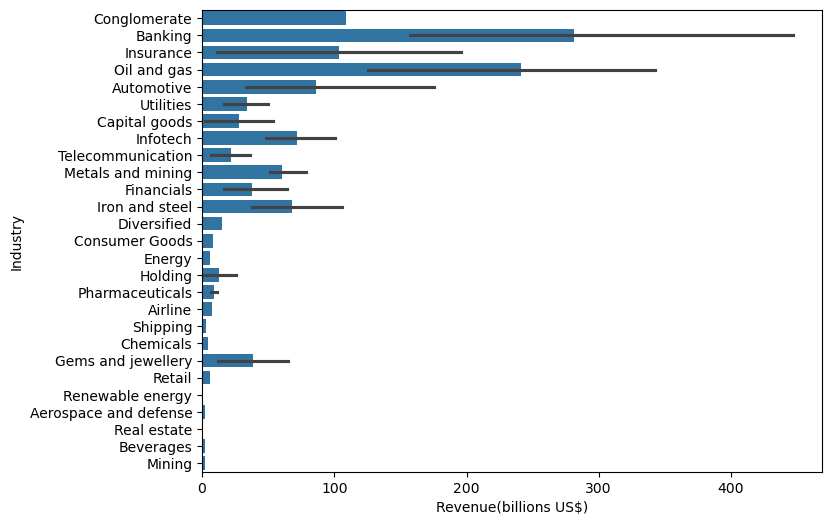

In [77]:
plt.figure(figsize=(8,6))
sns.barplot(
    y=df["Industry"],
    x=df["Revenue(billions US$)"],
    estimator=sum
)
plt.show()


Banking and Oil & Gas dominate India’s total revenue contribution, far ahead of all other industries.
Sectors like Retail, Telecom, and Pharmaceuticals contribute comparatively little to overall revenue.

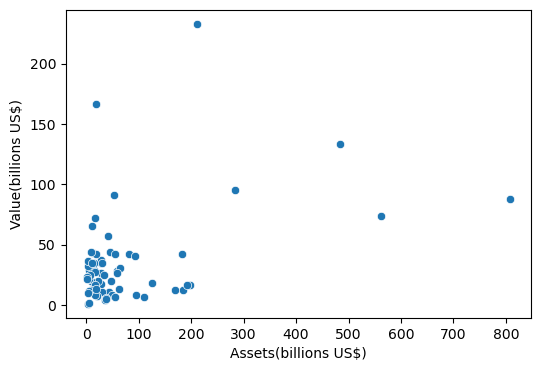

In [78]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df["Assets(billions US$)"],
    y=df["Value(billions US$)"]
)
plt.show()


Companies with high assets do not always have high market value.
A large cluster of firms holds big assets but delivers low market valuation, showing low investor confidence.

# ***Conclusion***

The analysis reveals that India’s corporate landscape is heavily dominated by a small group of high-revenue giants, causing strong right-skewness in revenue and profit distribution. A few companies generate massive revenue, while most remain mid-scale. The financial sector leads in total revenue contribution, highlighting its central role in the economy. Profitability does not always scale with revenue, proving that big companies aren’t automatically efficient. Overall, India’s top firms show strong asset bases but uneven performance across industries, indicating both growth opportunities and structural imbalances.